Función que calcula el peso entre los bordes de los nodos

In [1]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def weight(long1, lat1, long2, lat2, vm, h):
    mc = [1.0, 1.25, 1.5]
    d_lat = lat2 - lat1
    d_long = long2 - long1
    a = m.sin(d_lat/2)**2 + m.cos(lat1) * m.cos(lat2) * m.sin(d_long/2)**2
    c = 2 * m.atan(a)

    d = 6378 * c * 1000
    vm = vm / 3.6
    t = d/vm

    if (0 <= h <= 5) or (10 <= h <= 12) or (22 <= h <= 24):
        t = t * np.random.choice(mc, 1, p=[0.70,0.20,0.10])
    if 16 <= h <= 18:
        t = np.random.choice(mc, 1, p=[0.10,0.70,0.20])
    if (7 <= h <= 9) or (13 <= h <= 15) or (19 <= h <= 21):
        t = np.random.choice(mc, 1, p=[0.10,0.20,0.70])

    return round(float(t/60), 5)

Algoritmo de búsqueda de nodos Dijsktra

In [2]:
def dijsktra(graph, initial, end):
    shortest_paths = {initial: (None, 0)}
    current_node = initial
    visited = set()

    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)

        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return "Ruta imposible"
        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])

    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_paths[current_node][0]
        current_node = next_node
    path = path[::-1]
    return path

Creación de la clase Graph y función para crear el grafo

In [3]:
from collections import defaultdict
class Graph():
    def __init__(self):
        self.edges = defaultdict(set)
        self.weights = {}

    def add_edge(self, s, e, w):
        self.edges[s].add(e)
        self.edges[e].add(s)
        self.weights[(s, e)] = w
        self.weights[(e, s)] = w

    def add_directed_edge(self, s, e, w):
        self.edges[s].add(e)
        self.weights[(s, e)] = w

def readFiles(file1, file2, file3, hour):
    nodes = []
    edges = []
    velocities = []
    with open(file1) as f:
        for line in f.readlines():
            nodes.append((float(line.split()[1]), float(line.split()[2])))

    with open(file2) as f:
        for line in f.readlines():
            edges.append((int(line.split()[1]), int(line.split()[2])))

    with open(file3) as f:
        for line in f.readlines():
            velocities.append(int(line))

    edges = sorted(edges, key=lambda x: x[0])
    G = Graph()

    for i in range(len(edges)):
        s = edges[i][0]
        e = edges[i][1]
        G.add_edge(s, e, weight(nodes[s][0], nodes[s][1], nodes[e][0], nodes[e][1], velocities[i], hour))
    return G

Función que encapsula todo el programa

In [35]:
def Visualization(path_g):
    data = pd.read_csv("nodes2.txt", sep = " ", header = None)
    data.columns = ["id", "nor_x", "nor_y"]
    data = data.set_index("id")
    path = data.iloc[path_g]
    plt.subplots(figsize = (3, 3))
    plt.scatter(data["nor_x"], data["nor_y"], s = 1)
    plt.plot(path["nor_x"], path["nor_y"], "r-")

El camino más corto del punto 0 al punto 934 a las 12:00 horas es el siguiente: [0, 2, 3, 9, 17, 24, 26947, 16836, 16830, 16803, 16797, 16784, 16783, 16788, 16790, 16792, 16794, 16795, 16804, 16808, 23672, 23662, 23657, 23655, 23651, 23644, 23645, 23648, 23658, 23660, 23663, 23666, 23668, 23676, 23720, 23722, 23724, 27717, 27701, 27689, 27687, 27686, 27653, 27645, 27692, 27693, 27714, 55175, 55169, 55168, 55167, 27700, 27699, 27698, 27716, 27720, 44729, 44728, 44727, 44726, 44725, 44724, 44723, 38817, 38799, 38795, 38792, 38789, 38767, 38761, 38752, 38739, 38742, 38733, 38721, 26653, 26650, 26638, 26626, 26615, 26605, 26601, 26598, 26596, 26610, 26603, 21213, 21198, 21187, 21166, 21174, 21185, 21163, 21156, 21142, 17818, 17810, 21118, 21120, 17813, 17804, 17797, 17782, 17777, 17769, 17757, 17748, 17740, 17759, 17749, 17741, 17765, 17754, 17745, 17738, 17722, 17717, 17713, 17710, 17707, 17704, 17702, 7149, 7143, 7123, 7116, 7077, 3114, 3108, 3135, 3170, 3160, 3141, 3113, 3103, 3093, 308

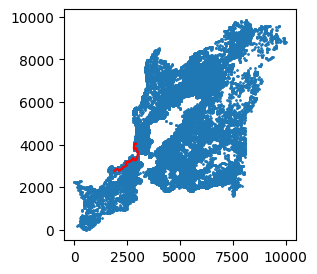

In [37]:
def App():
    h = int(input("Ingrese la hora en la que se calculará la ruta para calcular el tráfico aproximado de la zona: "))
    s = int(input("Ingrese el nodo de salida: "))
    e = int(input("Ingrese el nodo de llegada: "))
    G = readFiles("nodes2.txt", "edges2.txt", "max_vel.txt", h)
    path = dijsktra(G, s, e)
    print("El camino más corto del punto {} al punto {} a las {}:00 horas es el siguiente: {}".format(s, e, h, path))
    Visualization(path)
App()